In [1]:
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import time
from matplotlib import style
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

style.use('ggplot')

consumer_key = "nkVA4rEjD7en3Fe6TqJNOUztH"
consumer_secret = "BAlK7qQridq4jU7cxdA3irm9kPmBhkTM6sijiC5ZHzOQKUT5XZ"
access_token = "942242596738306048-vYMcMUhmDtT5lZ97cTkToxhIWAhtqPc"
access_token_secret = "NYDTT6uSLFUQCjiJfOig3DPv66nmQjKGdi7AN5CoRX88J"


analyzer = SentimentIntensityAnalyzer()

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(
    auth, parser=tweepy.parsers.JSONParser())

target_users = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]

sentiments = []

for target_user in target_users:

    counter = 1

    oldest_tweet = None

    for x in range(5):

        public_tweets = api.user_timeline(target_user, max_id=oldest_tweet)

        for tweet in public_tweets:

            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            oldest_tweet = tweet["id"] + 1

            sentiments.append(
                {"Source": target_user,
                 "Date": tweet["created_at"],
                 "Text": tweet["text"],
                 "Compound": compound,
                 "Positive": pos,
                 "Neutral": neu,
                 "Negative": neg,
                 "Tweets Ago": counter})
            
            counter += 1

sentiments_pd = pd.DataFrame.from_dict(sentiments)
timestamp = str(round(time.time()))
filename = 'twitter_sentiment_' + timestamp + '.csv'
sentiments_pd.to_csv(filename)
print(sentiments_pd.head())

   Compound                            Date  Negative  Neutral  Positive  \
0    0.0000  Tue Oct 02 19:02:07 +0000 2018     0.000    1.000     0.000   
1   -0.8020  Tue Oct 02 17:55:03 +0000 2018     0.427    0.573     0.000   
2    0.4019  Tue Oct 02 17:06:06 +0000 2018     0.000    0.847     0.153   
3    0.7096  Tue Oct 02 16:06:02 +0000 2018     0.000    0.766     0.234   
4   -0.2732  Tue Oct 02 14:06:04 +0000 2018     0.242    0.554     0.204   

  Source                                               Text  Tweets Ago  
0   @BBC  Discover the extraordinary story of how a smal...           1  
1   @BBC  Knife crime is up 22%. Who are the victims and...           2  
2   @BBC  The gender reveal party that sparked a massive...           3  
3   @BBC  In 2002, Iberian Lynx were the rarest cats in ...           4  
4   @BBC  Two scientists who discovered how to fight can...           5  


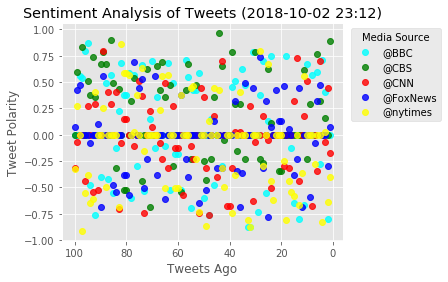

In [6]:
source_to_colors = {
    "@BBC": 'cyan',
    "@CBS": 'green',
    "@CNN": 'red',
    "@FoxNews": 'blue',
    "@nytimes": 'yellow'}
source_to_sent = {}
fig, ax = plt.subplots()
groups = sentiments_pd.groupby('Source')

for name, group in groups:
    x_vals = group["Tweets Ago"]
    y_vals = group["Compound"]
    source_to_sent[name] = np.mean(y_vals)
    ax.plot(
        x_vals, y_vals,
        marker="o", linestyle='',
        alpha=0.8, label=name,
        color=source_to_colors[name])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.84, box.height])
ax.legend(title='Media Source', loc=2, bbox_to_anchor=(1.01, 1.0))
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now})")
plt.xlim([x_vals.max() + 5, x_vals.min() - 5])
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
filename = 'scatter_' + '.jpg'
plt.savefig(filename)
plt.show()

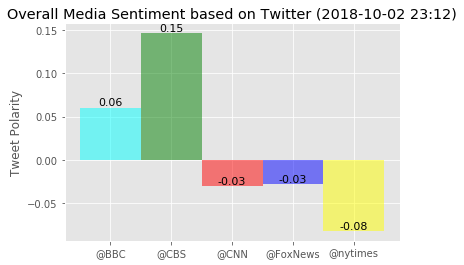

In [7]:
colors = [source_to_colors[target_user] for target_user in target_users]
fig, ax = plt.subplots()
x_pos = np.arange(len(target_users))
polarities = [source_to_sent[media] for media in target_users]
ax.bar(x_pos, polarities, width=1.0, align='center', alpha=0.5, color=colors)

for a, b in zip(x_pos, polarities):
    plt.text(
        a, b, '%.2f' % b,
        ha='center', va='bottom',
        fontsize=11)

plt.xticks(x_pos, target_users)
plt.ylabel("Tweet Polarity")
plt.title(f"Overall Media Sentiment based on Twitter ({now})")
filename = 'bar_' + '.jpg'
plt.savefig(filename)
plt.show()
